## Importing libraries

In [9]:
import requests
import os 
import pandas as pd
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Gathering Data

### Reading the manually downloaded file "twitter_archive_enhanced.csv"

In [10]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Programmatically downloading "image_predictions.tsv" using the Requests library.

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

### Downloading and storing set of JSON data in to "tweet_json.txt file" using the tweet IDs in the WeRateDogs Twitter archive and Tweepy library

In [5]:
consumer_key = 'state secret'
consumer_secret = 'state secret'
access_token = 'state secret'
access_token_secret = 'state secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
invalid_ids = []


In [6]:
with open('tweet_json.txt','w') as file:
    for i in twitter_archive.tweet_id:
        try:
            status = api.get_status(i)
            file.write(json.dumps(status._json)+'\n')
        except:
            invalid_ids.append(i)

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 733


### Reading and storing data in a DataFrame from tweet_json.txt

In [12]:
list_for_df = []
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        tweet = json.loads(line)
        list_for_df.append({'tweet_id': tweet['id'], 'favorite_count': tweet['favorite_count'] ,'retweet_count' : tweet['retweet_count']})

twitter_json = pd.DataFrame(list_for_df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

In [13]:
pd.DataFrame(invalid_ids).to_csv('invalid_ids.csv', encoding = 'utf-8', index = False)

In [15]:
invalid_ids = pd.read_csv('invalid_ids.csv')
invalid_ids

,0
0,888202515573088257
1,873697596434513921
2,869988702071779329
3,866816280283807744
4,861769973181624320
5,842892208864923648
6,837012587749474308
7,827228250799742977
8,802247111496568832
9,775096608509886464


## Assesing Data

### Twitter_archive.csv

Displaying twitter_archive variable info.

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

        *Data contains Retweets*

In [17]:
len(twitter_archive[twitter_archive.tweet_id.isin(image_pred.tweet_id)])

2075

        *Some tweet ids are not present in the images_prediction.tsv table*

Getting twitter_archive variable info and rating numeric metrics.

In [18]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


        *Min. rating_denominator of 0 is impossible, min. rating denominator of 0 seems to be an error too*

Looking first 10 rows of twitter_archive DataFrame


In [19]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Looking tweet text of the first 15 rows.

In [20]:
for i in twitter_archive.head(15).text:
    print('- ' + i)

- This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
- This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
- This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
- This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
- This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
- Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
- Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfA

Looking last 10 rows of twitter_archive DataFrame


In [21]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Looking tweet text of the first 15 rows.

In [22]:
for i in twitter_archive.tail(15).text:
    print('- ' + i)

- This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP
- Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7
- Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY
- Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx
- This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
- Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p
- My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O
- Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would d

        *Some tweet texts do not contain a name for the described dogs. Some are not even dogs. *

Looking for strange or invalid names in data

In [23]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Daisy               7
Buddy               7
Bailey              7
Toby                7
Milo                6
Oscar               6
Koda                6
Leo                 6
Jax                 6
Stanley             6
Rusty               6
Bella               6
Dave                6
Scout               6
Jack                6
Sunny               5
                 ... 
Darla               1
Maude               1
Margo               1
Sephie              1
Jerome              1
Tuck                1
Longfellow          1
Dixie               1
Augie               1
Brian               1
Swagger             1
Horace              1
Snoopy              1
Batdog              1
Willem    

In [24]:
for i in twitter_archive.text[-twitter_archive.name.str.istitle()]:
    print('- '+i)

- I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
- Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
- RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
- We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
- Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
- There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
- Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
- We only rate dogs. Please stop sen

In [25]:
for i in twitter_archive.text[twitter_archive.name == 'None']:
    print('- '+ i)

- Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
- When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
- Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
- You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
- This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
- @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
- RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
- I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
- Here we have a corgi undercover as a malamute. Pa

In [26]:
twitter_archive.name.value_counts()[twitter_archive.name.value_counts().index.str.islower()]

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
getting          2
mad              2
actually         2
such             1
space            1
life             1
all              1
unacceptable     1
by               1
infuriating      1
my               1
light            1
his              1
this             1
incredibly       1
officially       1
old              1
Name: name, dtype: int64

        *Some tweets do not contain dog names and others aren't filled correctly i.e. 'a', ''*
        *Dog names = 'None' should be null values instead*

Looking if all dog stages are correctly filled

In [27]:
sum(twitter_archive.doggo == 'doggo')

97

In [28]:
sum(twitter_archive.text.str.contains('doggo'))

98

In [29]:
sum(twitter_archive.floofer == 'floofer')

10

In [30]:
sum(twitter_archive.text.str.contains('floofer'))

4

In [31]:
sum(twitter_archive.puppo == 'puppo')

30

In [32]:
sum(twitter_archive.text.str.contains('puppo'))

37

In [33]:
sum(twitter_archive.pupper == 'pupper')

257

In [34]:
sum(twitter_archive.text.str.contains('pupper'))

272

        *Some dog stages present in text are not filled correctly in their respective column*

In [35]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Looking for strange rating_numerators

In [36]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
for i in twitter_archive.text[twitter_archive.rating_numerator > 20]:
    print('- '+ i)

- @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
- @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
- @markhoppus 182/10
- @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
- RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
- The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
- Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
- This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
- This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the l

        * Here I found some '&amp' strings instead of '&' in text *
        * Some of the tweets contain rating_numerators with decimals* 
 

In [38]:
for i in twitter_archive.text[twitter_archive.rating_numerator == 0]:
    print('- '+ i)

- When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
- PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


        *Rating numerators of 0 are not written by mistake but are not dog ratings*

In [39]:
for i in twitter_archive.text[twitter_archive.rating_denominator !=  10]:
    print('- ' + i)
twitter_archive.rating_denominator.value_counts()

- @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
- @docmisterio account started on 11/15/15
- The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
- Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
- RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
- Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
- After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
- Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
- Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
- This is Bluebert. He jus

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

        *Some of the ranking_denominators that are not 0 are not dog ratings and some are wrongly obtained* 
        *Some tweets do not contain images. This happens a lot in response tweets* 

## image_predictions.tsv

Showing image_pred info.

In [40]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Looking first 5 rows of image_predictions.tsv

In [41]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Looking last 5 rows of image_predictions.tsv

In [42]:
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Looking for repeated image urls

In [43]:
image_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                       

In [44]:
repeated_urls = image_pred.jpg_url.value_counts()[image_pred.jpg_url.value_counts() > 1]

In [45]:
image_pred[image_pred.jpg_url.isin(repeated_urls.index)].sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


        *Data contains 66 duplicated rows*

## twitter_json.text

Geting variable info and describing the table.

In [46]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 3 columns):
tweet_id          2346 non-null int64
favorite_count    2346 non-null int64
retweet_count     2346 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [47]:
twitter_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.346000e+03,2346.000000,2346.000000
mean,7.423380e+17,8110.713129,3060.127451
std,6.835504e+16,12192.644877,5081.258584
min,6.660209e+17,0.000000,0.000000
25%,6.783824e+17,1407.250000,611.250000
50%,7.189556e+17,3561.000000,1429.500000
75%,7.987010e+17,10045.750000,3567.000000
max,8.924206e+17,144138.000000,78105.000000


### Quality issues selected to fix

1. Duplicated rows (This was verified for the image_predictions.tsv table). 
1. Dataset contains retweets (This was verified por the twitter_archive.csv).
1. Some tweets do not contain images (This was verified por the twitter_archive.csv).
1. Some rating denominators are not equal to 10 (This was verified por the twitter_archive.csv. Values greater than 10 tend to be from images with many dogs or to be obtained wrong).
1. Invalid ids in twitter_archive.csv (This ids considered invalid may be deleted tweets for which we could not get stats with the Tweety API).
1. '&amp' strings instead of '&' in text (This was verified por the twitter_archive.csv).
1. Some tweets do not contain dog names and others aren't filled correctly i.e. 'a', '' (This was verified por the twitter_archive.csv).
1. Dog names = 'None' should be null values instead (This was verified por the twitter_archive.csv).
1. Dog stages aren't filled correctly (Some tweet texts contain dog stages which are not filled in the appropiate column).


###  Tidiness issues selected to fix

2. Rating is divided in two columns: Numerator and denominator (Rating should be shown in a single column).
2. Dog stage is divided in 4 columns: doggo, floofer, pupper and puppo (Dog stage should be shown in a single column).

# Cleaning Data

First lets duplicate original dataframes to work with them.

In [48]:
TWarchive = twitter_archive
Imgpred = image_pred
TWjson = twitter_json

## Cleaning quality issues

#### Quality Issue 1

###### Define

img_predictions.tsv contains duplicated rows, we have to remove them.

###### Code

In [49]:
Imgpred = Imgpred.drop_duplicates('jpg_url')

###### Test

In [50]:
Imgpred.jpg_url.value_counts()

https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg                                            1
https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg                                            1
https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg                                            1
https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg                                            1
https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg                                            1
https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg                                            1
https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg                                            1
https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg                                            1
https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg                                            1
https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg                                            1
https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg                       

#### Quality Issue 2

###### Define

The twitter_archive.csv dataset contains retweets, which should not be taken in count.

###### Code

In [51]:
TWarchive = TWarchive[TWarchive.retweeted_status_id.isnull()]

###### Test

In [52]:
TWarchive.text[TWarchive.text.str.contains('RT @')]

Series([], Name: text, dtype: object)

#### Quality Issue 3

###### Define

In twitter_archive.csv, some tweets have no image. Since image_pred.tsv conly contains Tweets with images, we may filter for 

###### Code

In [53]:
TWarchive = TWarchive[TWarchive.tweet_id.isin(Imgpred.tweet_id)]

###### Test

In [54]:
len(TWarchive[-TWarchive.text.str.contains('t.co')])

0

#### Quality Issue 4

###### Define

Rating numerators of 0 are not dog ratings. Some rating denominators in twitter_archive.csv are not equal to 10, by standarising the denominator to 10 we can later get a single "rating column" for tidiness.

###### Code

In [55]:
TWarchive = TWarchive[TWarchive.rating_denominator == 10]
TWarchive = TWarchive[TWarchive.rating_numerator != 0]


###### Test

In [56]:
TWarchive.rating_denominator.value_counts()

10    1974
Name: rating_denominator, dtype: int64

#### Quality Issue 5

###### Define

Invalid ids for deleted tweets in twitter_archive.csv.

###### Code

In [57]:
TWarchive = TWarchive[-TWarchive.tweet_id.isin(invalid_ids)]

###### Test

In [58]:
len(TWarchive[TWarchive.tweet_id.isin(invalid_ids)])

0

#### Quality Issue 6

###### Define

Text in tweets contain '&amp' strings instead of '&'.

###### Code

In [59]:
TWarchive.text = TWarchive.text.str.replace('&amp;', '&')

###### Test

In [60]:
TWarchive.text[TWarchive.text.str.contains('&')]

262     Meet Indie. She's not a fan of baths but she's...
320     Meet Chester (bottom) & Harold (top). They are...
461     Say hello to Eugene & Patti Melt. No matter ho...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie & Lila. Maggie is the doggo, Lila ...
898     This is Lilli Bee & Honey Bear. Unfortunately,...
976     Meet Jax & Jil. Jil is yelling the pledge of a...
1104    Meet Buckley. His family & some neighbors came...
1179    Meet Sid & Murphy. Murphy floats alongside Sid...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1366    Meet Rambo & Kiwi. Rambo's the pup with the sh...
1421    Meet Beau & Wilbur. Wilbur stole Beau's bed fr...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1481    This is Sadie and her 2 pups Shebang & Ruffalo...
1508    When bae says they can't go out but you see th...
1524    This is Lolo. She's America af. Behind in scie...
1538    Meet F

#### Quality Issue 7

###### Define

Invalid dog names.

###### Code

In [61]:
invalid_names = TWarchive.name.value_counts()[TWarchive.name.value_counts().index.str.islower()].index
for i in invalid_names:
    TWarchive.name = TWarchive.name.replace(i,np.nan)

###### Test

In [62]:
TWarchive.name.value_counts()[TWarchive.name.value_counts().index.str.islower()]

Series([], Name: name, dtype: int64)

#### Quality Issue 8

###### Define

Dog names "None" should be filled with null values intead.

###### Code

In [63]:
TWarchive.name = TWarchive.name.replace('None',np.nan)

###### Test

In [64]:
TWarchive.name.value_counts()

Charlie           11
Oliver            10
Lucy              10
Cooper            10
Tucker             9
Penny              9
Winston            8
Sadie              8
Lola               7
Toby               7
Daisy              7
Koda               6
Bo                 6
Bella              6
Stanley            6
Jax                6
Buddy              5
Bailey             5
Dave               5
Scout              5
Milo               5
Chester            5
Louis              5
Leo                5
Oscar              5
Rusty              5
Reggie             4
Bentley            4
George             4
Gary               4
                  ..
Damon              1
Mack               1
Banditt            1
DayZ               1
Strider            1
Edd                1
Maisey             1
Arnold             1
Batdog             1
Diogi              1
Anthony            1
Obi                1
Kane               1
Vince              1
Brian              1
Swagger            1
Horace       

#### Quality Issue 9

###### Define

Some tweet texts contain dog stages which are not filled in the appropiate column.

###### Code

In [65]:
TWarchive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [66]:
TWarchive.doggo[TWarchive.text.str.contains('doggo')] = 'doggo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
TWarchive.doggo[TWarchive.text.str.contains('doggo')].value_counts()

doggo    75
Name: doggo, dtype: int64

In [68]:
TWarchive.floofer[TWarchive.text.str.contains('floofer')] = 'floofer'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
TWarchive.pupper[TWarchive.text.str.contains('pupper')] = 'pupper'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
TWarchive.puppo[TWarchive.text.str.contains('puppo')] = 'puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Test

In [71]:
TWarchive.floofer[TWarchive.text.str.contains('floofer')].value_counts()

floofer    3
Name: floofer, dtype: int64

In [72]:
TWarchive.pupper[TWarchive.text.str.contains('pupper')].value_counts()

pupper    223
Name: pupper, dtype: int64

In [73]:
TWarchive.puppo[TWarchive.text.str.contains('puppo')].value_counts()

puppo    28
Name: puppo, dtype: int64

In [74]:
TWarchive.doggo[TWarchive.text.str.contains('doggo')].value_counts()

doggo    75
Name: doggo, dtype: int64

## Cleaning tidiness issues

##### Tidiness issue 1

###### Define

Rating is divided in two columns: Numerator and denominator, it should be shown in a single column.

###### Code

In [75]:
TWarchive['rating'] = TWarchive.rating_numerator*10/TWarchive.rating_denominator
TWarchive['rating'] =TWarchive['rating'].apply(int)


###### Test

In [76]:
TWarchive['rating'].value_counts()

12      450
10      419
11      396
13      261
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
420       1
26        1
27        1
75        1
1776      1
Name: rating, dtype: int64

##### Tidiness issue 2

###### Define

Dog stage is divided in 4 columns: doggo, floofer, pupper and puppo. Should be shown in a single column.

###### Code

In [77]:
TWarchive['dog_stage'] = np.nan

TWarchive.dog_stage[TWarchive.floofer != 'None'] = 'floofer'
TWarchive.dog_stage[TWarchive.pupper != 'None'] = 'pupper'
TWarchive.dog_stage[TWarchive.puppo != 'None'] = 'puppo'
TWarchive.dog_stage[TWarchive.doggo != 'None'] = 'doggo'


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

###### Test

In [78]:
TWarchive.dog_stage.value_counts()

pupper     220
doggo       79
puppo       27
floofer      7
Name: dog_stage, dtype: int64

In [79]:
TWarchive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'dog_stage'],
      dtype='object')

In [80]:
len(TWarchive)

1974

## Merging and storing tables into twitter_archive_master.csv

In [113]:
twitter_archive_master1 = TWarchive.merge(Imgpred, on = ['tweet_id'], how = 'inner')
twitter_archive_master2 = twitter_archive_master1.merge(TWjson, on = ['tweet_id'], how = 'inner')
twitter_archive_master2.dog_stage = twitter_archive_master2.dog_stage.str.title()
twitter_archive_master2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

In [114]:
twitter_archive_master3 = twitter_archive_master2.drop(['pupper','doggo','floofer', 'puppo','rating_numerator',
                                                        'rating_denominator', 'retweeted_status_id',
                                                        'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)


In [115]:
len(twitter_archive_master3)

1974

In [116]:
twitter_archive_master3.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'rating', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [117]:
twitter_archive_master3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Data columns (total 23 columns):
tweet_id                 1974 non-null int64
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1974 non-null object
source                   1974 non-null object
text                     1974 non-null object
expanded_urls            1974 non-null object
name                     1347 non-null object
rating                   1974 non-null int64
dog_stage                333 non-null object
jpg_url                  1974 non-null object
img_num                  1974 non-null int64
p1                       1974 non-null object
p1_conf                  1974 non-null float64
p1_dog                   1974 non-null bool
p2                       1974 non-null object
p2_conf                  1974 non-null float64
p2_dog                   1974 non-null bool
p3                       1974 non-null object
p3_conf                  19

In [118]:
twitter_archive_master3.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyze and visualize data

In [119]:
Master = pd.read_csv('twitter_archive_master.csv')
Master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39074,8683
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33463,6378
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25222,4236
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42444,8783
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40599,9566


In [120]:
Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 23 columns):
tweet_id                 1974 non-null int64
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1974 non-null object
source                   1974 non-null object
text                     1974 non-null object
expanded_urls            1974 non-null object
name                     1347 non-null object
rating                   1974 non-null int64
dog_stage                333 non-null object
jpg_url                  1974 non-null object
img_num                  1974 non-null int64
p1                       1974 non-null object
p1_conf                  1974 non-null float64
p1_dog                   1974 non-null bool
p2                       1974 non-null object
p2_conf                  1974 non-null float64
p2_dog                   1974 non-null bool
p3                       1974 non-null object
p3_conf                  19

In [121]:
Master.rating.describe()

count    1974.000000
mean       11.710233
std        40.870249
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [122]:
Master.rating.value_counts()

12      450
10      419
11      396
13      261
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
420       1
26        1
27        1
75        1
1776      1
Name: rating, dtype: int64

In [123]:
for i in Master.text[Master.rating == 1776]:
    print('- ' +i)
    
for i in Master.text[Master.rating == 420]:
    print('- ' + i)
    
for i in Master.text[Master.rating == 75]:
    print('- ' + i) 
    
Master = Master[(Master.rating != 1776) & (Master.rating != 420) & (Master.rating != 75)]

- This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
- After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
- This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


In [124]:
def gets_date(x):
    x = x.split()[0]
    x = datetime.datetime.strptime(x, '%Y-%m-%d')
    return x

Master.timestamp = Master.timestamp.apply(gets_date)


Text(0,0.5,'Frequency')

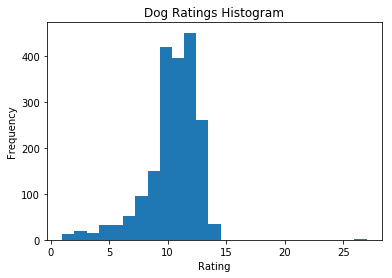

In [125]:
plt.hist(Master.rating, bins = 25)
plt.title("Dog Ratings Histogram")
plt.xlabel("Rating")
plt.ylabel("Frequency")

In [126]:
Master.dog_stage.value_counts()

Pupper     220
Doggo       79
Puppo       27
Floofer      7
Name: dog_stage, dtype: int64

Text(0.5,1,'Dog population composition by dog stage')

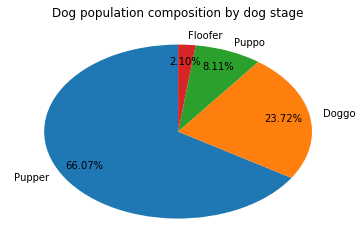

In [127]:
plt.pie(Master.dog_stage.value_counts().values, labels = Master.dog_stage.value_counts().index, 
        autopct='%1.2f%%', startangle = 90, pctdistance=0.8)
plt.title('Dog population composition by dog stage')

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(1.7999999999999998, 20)

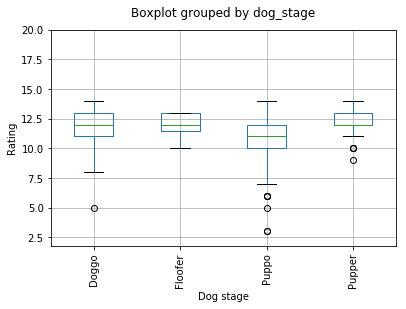

In [128]:
data = [Master.rating[Master.dog_stage == 'doggo'],
        Master.rating[Master.dog_stage == 'floofer'], 
        Master.rating[Master.dog_stage == 'puppo'],
       Master.rating[Master.dog_stage == 'pupper']]

Master.boxplot(column = ['rating'], by = ['dog_stage'])
plt.xticks([1,2,3,4], ['Doggo', 'Floofer', 'Puppo', 'Pupper'], rotation='vertical')
plt.xlabel('Dog stage')
plt.title('')
plt.ylabel('Rating')
plt.ylim(ymax=20)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(-6853.0500000000002, 40000)

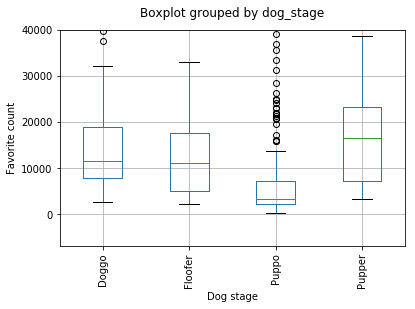

In [129]:
data = [Master.rating[Master.dog_stage == 'doggo'],
        Master.rating[Master.dog_stage == 'floofer'], 
        Master.rating[Master.dog_stage == 'puppo'],
       Master.rating[Master.dog_stage == 'pupper']]

Master.boxplot(column = ['favorite_count'], by = ['dog_stage'])
plt.xticks([1,2,3,4], ['Doggo', 'Floofer', 'Puppo', 'Pupper'], rotation='vertical')
plt.xlabel('Dog stage')
plt.title('')
plt.ylabel('Favorite count')
plt.ylim(ymax=40000)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(-3810.75, 10000)

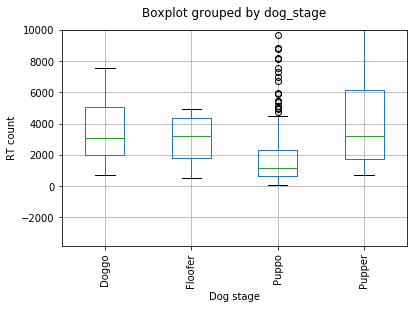

In [130]:
data = [Master.rating[Master.dog_stage == 'doggo'],
        Master.rating[Master.dog_stage == 'floofer'], 
        Master.rating[Master.dog_stage == 'puppo'],
       Master.rating[Master.dog_stage == 'pupper']]

Master.boxplot(column = ['retweet_count'], by = ['dog_stage'])
plt.xticks([1,2,3,4], ['Doggo', 'Floofer', 'Puppo', 'Pupper'], rotation='vertical')
plt.xlabel('Dog stage')
plt.title('')
plt.ylabel('RT count')
plt.ylim(ymax=10000)